In [5]:
# 📦 Install necessary libraries (run once if needed)
!pip install mlxtend networkx matplotlib


In [6]:
# 📌 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [7]:
# 📌 Sample transaction dataset
dataset = [
    ['milk', 'bread', 'nuts', 'apple'],
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'bread', 'apple'],
    ['milk', 'bread', 'apple'],
    ['milk', 'bread', 'apple', 'banana']
]


In [8]:
# 🔄 Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)

print("🔍 One-Hot Encoded Transactions:")
display(df)


🔍 One-Hot Encoded Transactions:


,apple,banana,bread,milk,nuts
0,True,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,False
3,True,False,True,True,False
4,True,False,True,True,False
5,True,True,True,True,False


In [9]:
# 📈 Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print("✅ Frequent Itemsets:")
display(frequent_itemsets)


✅ Frequent Itemsets:


,support,itemsets
0,0.666667,(apple)
1,1.000000,(bread)
2,1.000000,(milk)
3,0.666667,"(bread, apple)"
4,0.666667,"(milk, apple)"
5,1.000000,"(bread, milk)"
6,0.666667,"(bread, milk, apple)"


In [10]:
# 🔗 Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("📊 Association Rules:")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


📊 Association Rules:


C:\Users\Student\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,(bread),(apple),0.666667,0.666667,1.0
1,(apple),(bread),0.666667,1.000000,1.0
2,(milk),(apple),0.666667,0.666667,1.0
3,(apple),(milk),0.666667,1.000000,1.0
4,(bread),(milk),1.000000,1.000000,1.0
5,(milk),(bread),1.000000,1.000000,1.0
6,"(bread, milk)",(apple),0.666667,0.666667,1.0
7,"(bread, apple)",(milk),0.666667,1.000000,1.0
8,"(milk, apple)",(bread),0.666667,1.000000,1.0
9,(bread),"(milk, apple)",0.666667,0.666667,1.0


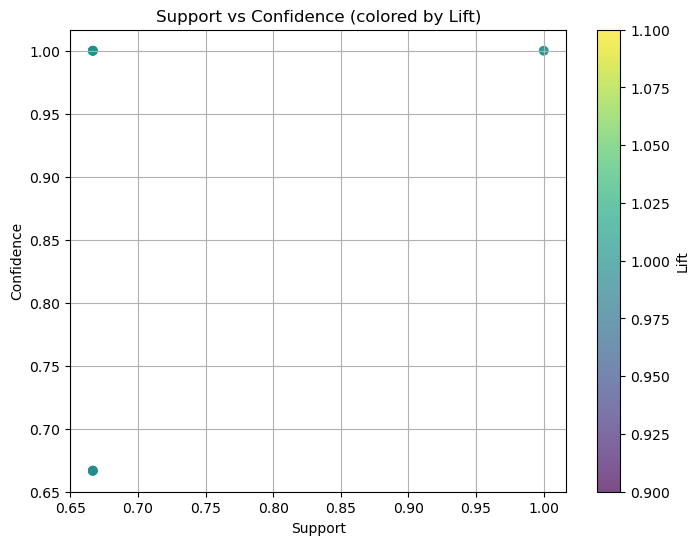

In [11]:
# 🎯 Visualization 1: Scatter plot (support vs confidence)
plt.figure(figsize=(8,6))
scatter = plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.colorbar(scatter, label='Lift')
plt.title('Support vs Confidence (colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


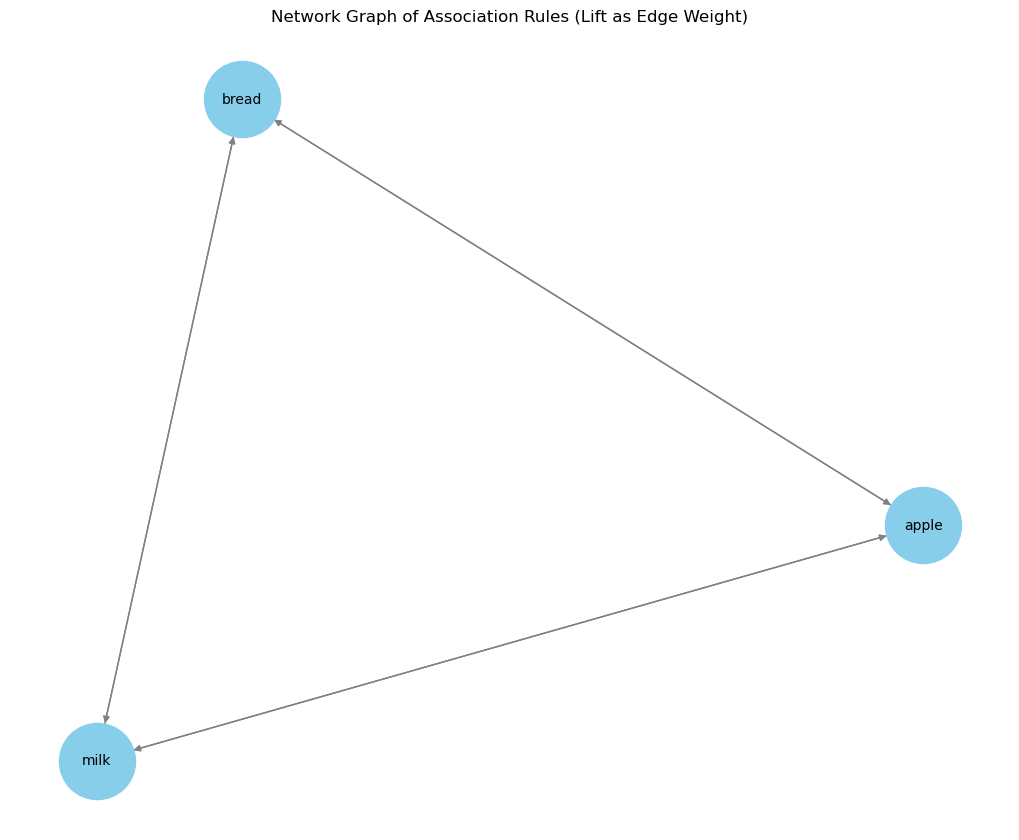

In [12]:
# 🎯 Visualization 2: Network graph
G = nx.DiGraph()

for _, row in rules.iterrows():
    for ant in row['antecedents']:
        for con in row['consequents']:
            G.add_edge(ant, con, weight=row['lift'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, pos,
        with_labels=True,
        node_color='skyblue',
        node_size=3000,
        font_size=10,
        width=weights,
        edge_color='gray',
        arrows=True)
plt.title("Network Graph of Association Rules (Lift as Edge Weight)")
plt.show()
